Import knihoven


In [521]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [522]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [523]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [524]:
searched_object = 'pottedplant' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

58


nacte a zobrazy zvoleny obrazek

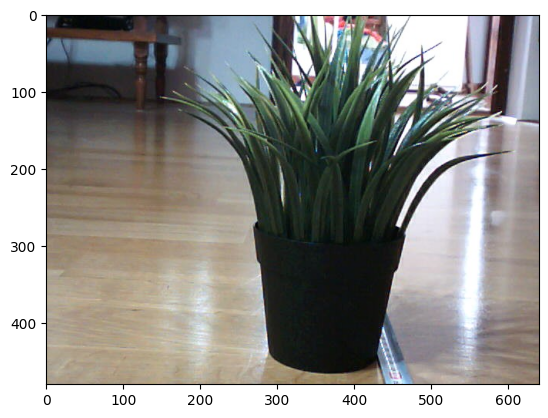

In [525]:
img = cv2.imread('40.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [526]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [527]:
results = model(img)#applies model on the image 



0: 480x640 1 potted plant, 1 dining table, 1 vase, 501.4ms
Speed: 3.0ms preprocess, 501.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [528]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            if cls == 58:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            if cls == 58:
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            if cls == 58:
                cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

vase
75
X= 267 Y= 270 W= 467 H= 469
center: 367 369
confidence: 88
-259
pottedplant
58
X= 144 Y= 0 W= 609 H= 470
center: 376 235
confidence: 67
10
diningtable
60
X= 31 Y= 135 W= 637 H= 478
center: 334 306
confidence: 59
-133


array([[[ 67,  50,  53],
        [ 67,  50,  53],
        [ 67,  50,  53],
        ...,
        [171, 155, 142],
        [170, 154, 141],
        [168, 152, 139]],

       [[ 73,  56,  59],
        [ 71,  57,  59],
        [ 73,  56,  59],
        ...,
        [171, 155, 142],
        [170, 154, 141],
        [168, 152, 139]],

       [[ 70,  56,  58],
        [ 69,  56,  58],
        [ 71,  57,  59],
        ...,
        [172, 156, 144],
        [168, 154, 142],
        [166, 152, 140]],

       ...,

       [[129, 156, 166],
        [130, 157, 167],
        [132, 157, 167],
        ...,
        [111, 128, 149],
        [109, 126, 147],
        [106, 125, 146]],

       [[134, 160, 167],
        [134, 160, 167],
        [136, 159, 167],
        ...,
        [106, 129, 151],
        [104, 127, 149],
        [102, 126, 148]],

       [[136, 160, 166],
        [136, 160, 166],
        [136, 159, 167],
        ...,
        [ 96, 120, 142],
        [ 92, 118, 142],
        [ 90, 116, 140]]

vypise id nalezenych objektu 

In [529]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[75, 58, 60]
[(367, 369), (376, 235), (334, 306)]
[469, 470, 478]


hledani urciteho objektu

In [530]:
a = objects_ids.index(58)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 
h = objects_heights[a]
print(h)
d=distances[a]
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) 
print(d)
distance_cm = 0.297982*d+19.2791
print('distance:',distance_cm)





1
376 235
deviation =  -56
470
10
distance: 22.25892


ukaze obrazek

tensor([[2.6756e+02, 2.7056e+02, 4.6793e+02, 4.6965e+02, 8.8286e-01, 7.5000e+01],
        [1.4428e+02, 0.0000e+00, 6.0925e+02, 4.7025e+02, 6.7950e-01, 5.8000e+01],
        [3.1779e+01, 1.3573e+02, 6.3781e+02, 4.7825e+02, 5.9710e-01, 6.0000e+01]])


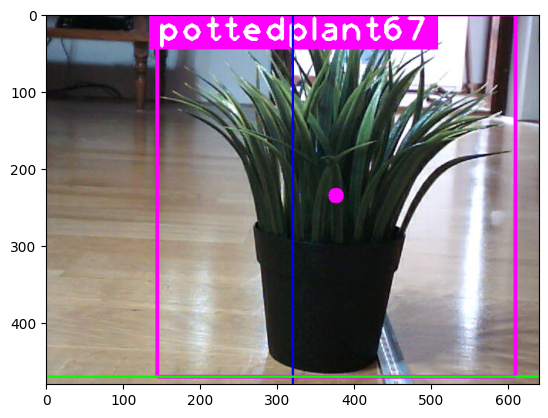

In [531]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
